In [1]:
import pandas as pd
# NeuralProphet 클래스 불러오기
from neuralprophet import NeuralProphet, set_log_level
from neuralprophet import set_random_seed
from sklearn.metrics import mean_squared_error, mean_absolute_error

C:\Users\tj-bu\AppData\Roaming\Python\Python310\site-packages\plotly_resampler\aggregation\aggregators.py:25: UserWarning: Could not import lttbc; will use a (slower) python alternative.
  warnings.warn("Could not import lttbc; will use a (slower) python alternative.")


In [2]:
df = pd.read_csv("인천교통공사_역별일별 이용인원현황_20230630.csv", encoding='cp949')
df

,호선,통행일자,역명,구분,이용인원
0,1,2022-07-01,계양,승차,3425
1,1,2022-07-01,계양,하차,3307
2,1,2022-07-02,계양,승차,2826
3,1,2022-07-02,계양,하차,2862
4,1,2022-07-03,계양,승차,2074
...,...,...,...,...,...
49635,7,2023-06-28,석남,하차,6791
49636,7,2023-06-29,석남,승차,7061
49637,7,2023-06-29,석남,하차,6193
49638,7,2023-06-30,석남,승차,8160


In [3]:
df=df[df['구분']=='하차']
df.drop(['호선','구분'], axis=1,inplace=True)
df

WARNING - (py.warnings._showwarnmsg) - C:\Users\tj-bu\AppData\Local\Temp\ipykernel_5828\990016310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['호선','구분'], axis=1,inplace=True)



,통행일자,역명,이용인원
1,2022-07-01,계양,3307
3,2022-07-02,계양,2862
5,2022-07-03,계양,2325
7,2022-07-04,계양,3309
9,2022-07-05,계양,3368
...,...,...,...
49631,2023-06-26,석남,6230
49633,2023-06-27,석남,6717
49635,2023-06-28,석남,6791
49637,2023-06-29,석남,6193


In [4]:
df = df[['통행일자', '이용인원', '역명']]
df

,통행일자,이용인원,역명
1,2022-07-01,3307,계양
3,2022-07-02,2862,계양
5,2022-07-03,2325,계양
7,2022-07-04,3309,계양
9,2022-07-05,3368,계양
...,...,...,...
49631,2023-06-26,6230,석남
49633,2023-06-27,6717,석남
49635,2023-06-28,6791,석남
49637,2023-06-29,6193,석남


In [5]:
df.columns = ['ds', 'y', 'location']
df['ds'] = pd.to_datetime(df['ds'])
df

,ds,y,location
1,2022-07-01,3307,계양
3,2022-07-02,2862,계양
5,2022-07-03,2325,계양
7,2022-07-04,3309,계양
9,2022-07-05,3368,계양
...,...,...,...
49631,2023-06-26,6230,석남
49633,2023-06-27,6717,석남
49635,2023-06-28,6791,석남
49637,2023-06-29,6193,석남


In [6]:
df1 = df[df['location']=='송도달빛축제공원']
df1 = df1[['ds','y']]
df1

,ds,y
21171,2022-07-01,4576
21173,2022-07-02,3331
21175,2022-07-03,2903
21177,2022-07-04,4387
21179,2022-07-05,4461
...,...,...
21891,2023-06-26,4563
21893,2023-06-27,5179
21895,2023-06-28,5248
21897,2023-06-29,4421


In [7]:
# 원본 데이터프레임에서 랜덤하게 10%의 행을 선택하여 새로운 데이터프레임 생성
df1_sampled = df1.sample(frac=0.1, random_state=42)

# 선택한 행을 원본 데이터프레임에서 제거
df1_drop = df1.drop(df1_sampled.index)
df1_sampled = df1_sampled.sort_values(by='ds')

df1_sampled

,ds,y
21171,2022-07-01,4576
21189,2022-07-10,2651
21201,2022-07-16,3302
21221,2022-07-26,4131
21237,2022-08-03,3638
21249,2022-08-09,3326
21255,2022-08-12,4183
21281,2022-08-25,4182
21285,2022-08-27,15330
21315,2022-09-11,2421


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24820 entries, 1 to 49639
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ds        24820 non-null  datetime64[ns]
 1   y         24820 non-null  int64         
 2   location  24820 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 775.6+ KB


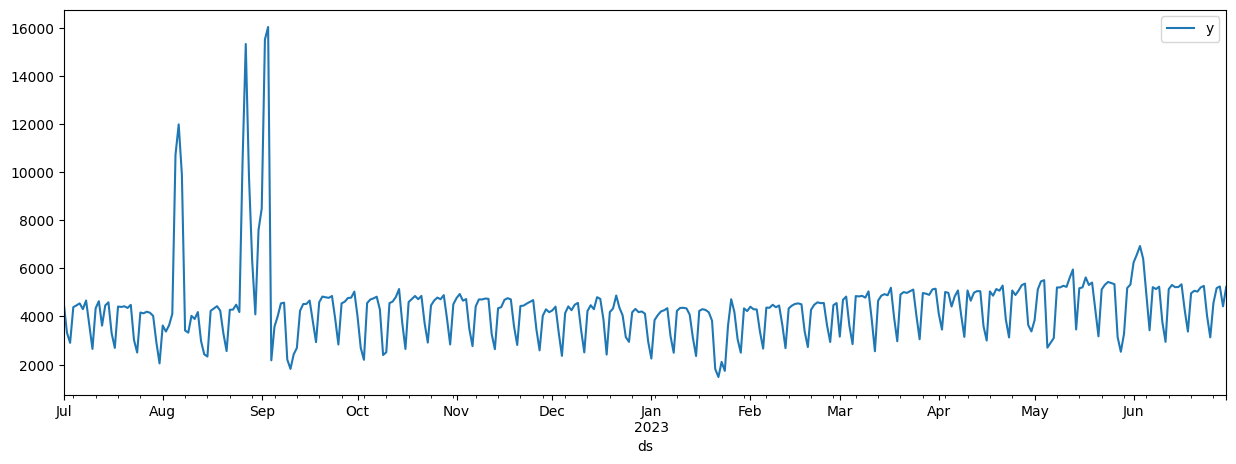

In [9]:
plt = df1.plot(x="ds", y="y", figsize=(15, 5))

In [10]:
# 오류가 아닌 경우 로깅 메시지 비활성화
set_log_level("ERROR")
set_random_seed(0)

# 기본 매개변수로 NeuralProphet 모델 생성
m = NeuralProphet(
#     trend_reg=1, # 트렌드의 기울기(높을수록 기울기가 낮아짐)
    
#     n_changepoints=0,
    # Enable all seasonality components
    yearly_seasonality=True,
    weekly_seasonality=True,
#     daily_seasonality=True,
#     n_lags=10,
#     n_forecasts=30
)

# df1_train, df1_val = m.split_df(df1, valid_p=0.1)
print("Dataset size:", len(df1))
print("Train dataset size:", len(df1_drop))
print("Validation dataset size:", len(df1_sampled))

Dataset size: 365
Train dataset size: 329
Validation dataset size: 36


In [11]:
# 데이터셋에 모델 피팅하기 (이 과정은 시간이 걸릴 수 있습니다)
metrics = m.fit(df1_drop, validation_df=df1_sampled)
# metrics

# metrics = m.fit(df1)

Finding best initial lr:   0%|          | 0/215 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 21it [00:00, ?it/s]

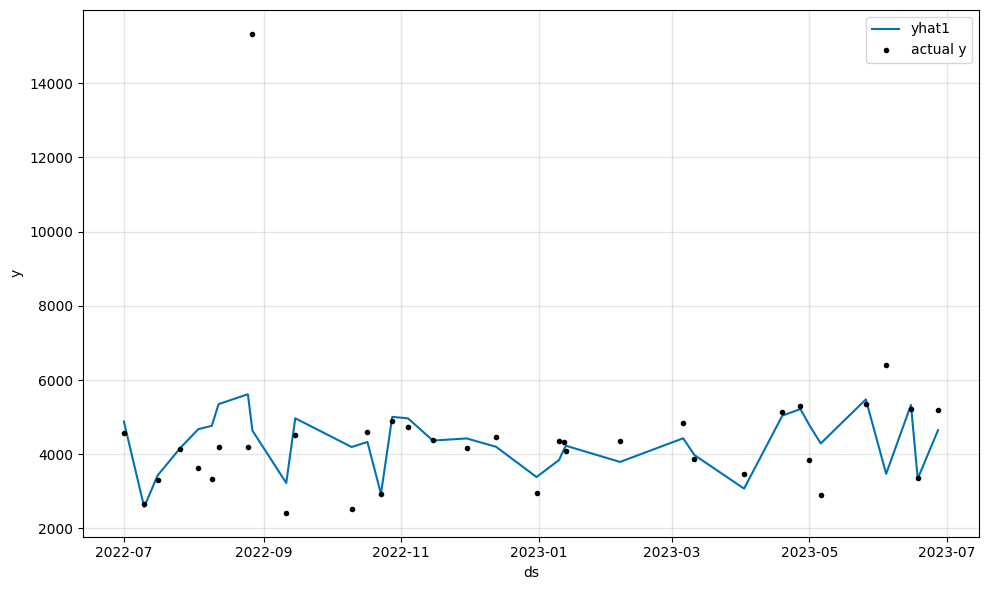

In [14]:
forecast = m.predict(df1_sampled)
m.set_plotting_backend("matplotlib")
m.plot(forecast)

In [13]:
m.plot_parameters(components=["trend", "seasonality"])

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'type': 'scatter',
              'uid': '8763423f-ec8f-4a5d-a0d1-80cad4c5223f',
              'x': array([datetime.datetime(2022, 7, 2, 0, 0),
                          datetime.datetime(2022, 7, 3, 0, 0),
                          datetime.datetime(2022, 7, 4, 0, 0), ...,
                          datetime.datetime(2023, 6, 28, 0, 0),
                          datetime.datetime(2023, 6, 29, 0, 0),
                          datetime.datetime(2023, 6, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([3567.79302883, 3573.8773759 , 3579.96172297, ..., 3610.40733402,
                          3596.1010116 , 3581.79468918]),
              'yaxis': 'y'},
             {'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
         

In [58]:
# 검증 데이터에 대한 모델 성능 평가
actual = df1_sampled['y'].values
predicted = forecast['yhat1'].values  # 예측된 값의 열 이름에 따라 조정

mse = mean_squared_error(actual, predicted)
mae = mean_absolute_error(actual, predicted)

print(f"평균 제곱 오차: {mse:.2f}")
print(f"평균 절대 오차: {mae:.2f}")

평균 제곱 오차: 3829639.89
평균 절대 오차: 818.27


In [ ]:
df1.